In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split   #데이터 셋 분리
from sklearn.metrics import accuracy_score  #분류 평가
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.tree import DecisionTreeClassifier

##########데이터 로드

df = pd.read_csv('../data/Tourism_pre.CSV')
labels = ['구매안함','구매']

##########데이터 분석

##########데이터 전처리

y_target = df['ProdTaken']
x_data = df.drop(['ProdTaken'],axis=1)

x_train, x_test, y_train , y_test = train_test_split(x_data , y_target ,test_size=0.3, random_state=42,stratify=y_target)

##########모델 생성

model = DecisionTreeClassifier(random_state=43, max_depth=5)
##########모델 학습

model.fit(x_train, y_train)

##########모델 검증

print(f'훈련_Accuracy: {model.score(x_train, y_train)}') 
print(f'테스트_Accuracy: {model.score(x_test, y_test)}') 

#평가 리포트
y_predict = model.predict(x_test)
print(classification_report(y_test,y_predict,target_names=labels))

##########모델 예측

x_real = np.array([
    [20.0,1,3,6.0,2,1,3,3.0,1,3.0,2,1.0,1,2,1,0.0,2,20993.0]
])

y_real_predict = model.predict(x_real)
label = labels[y_real_predict[0]]
y_real_proba = model.predict_proba(x_real)
confidence = y_real_proba[0][y_real_proba[0].argmax()]

print(f'분류결과:{label} {confidence}')

훈련_Accuracy: 0.8645710928319624
테스트_Accuracy: 0.8471555860178204
              precision    recall  f1-score   support

        구매안함       0.87      0.96      0.91      1184
          구매       0.68      0.36      0.47       275

    accuracy                           0.85      1459
   macro avg       0.77      0.66      0.69      1459
weighted avg       0.83      0.85      0.83      1459

분류결과:구매안함 0.5740740740740741


## 모델 트리 그림

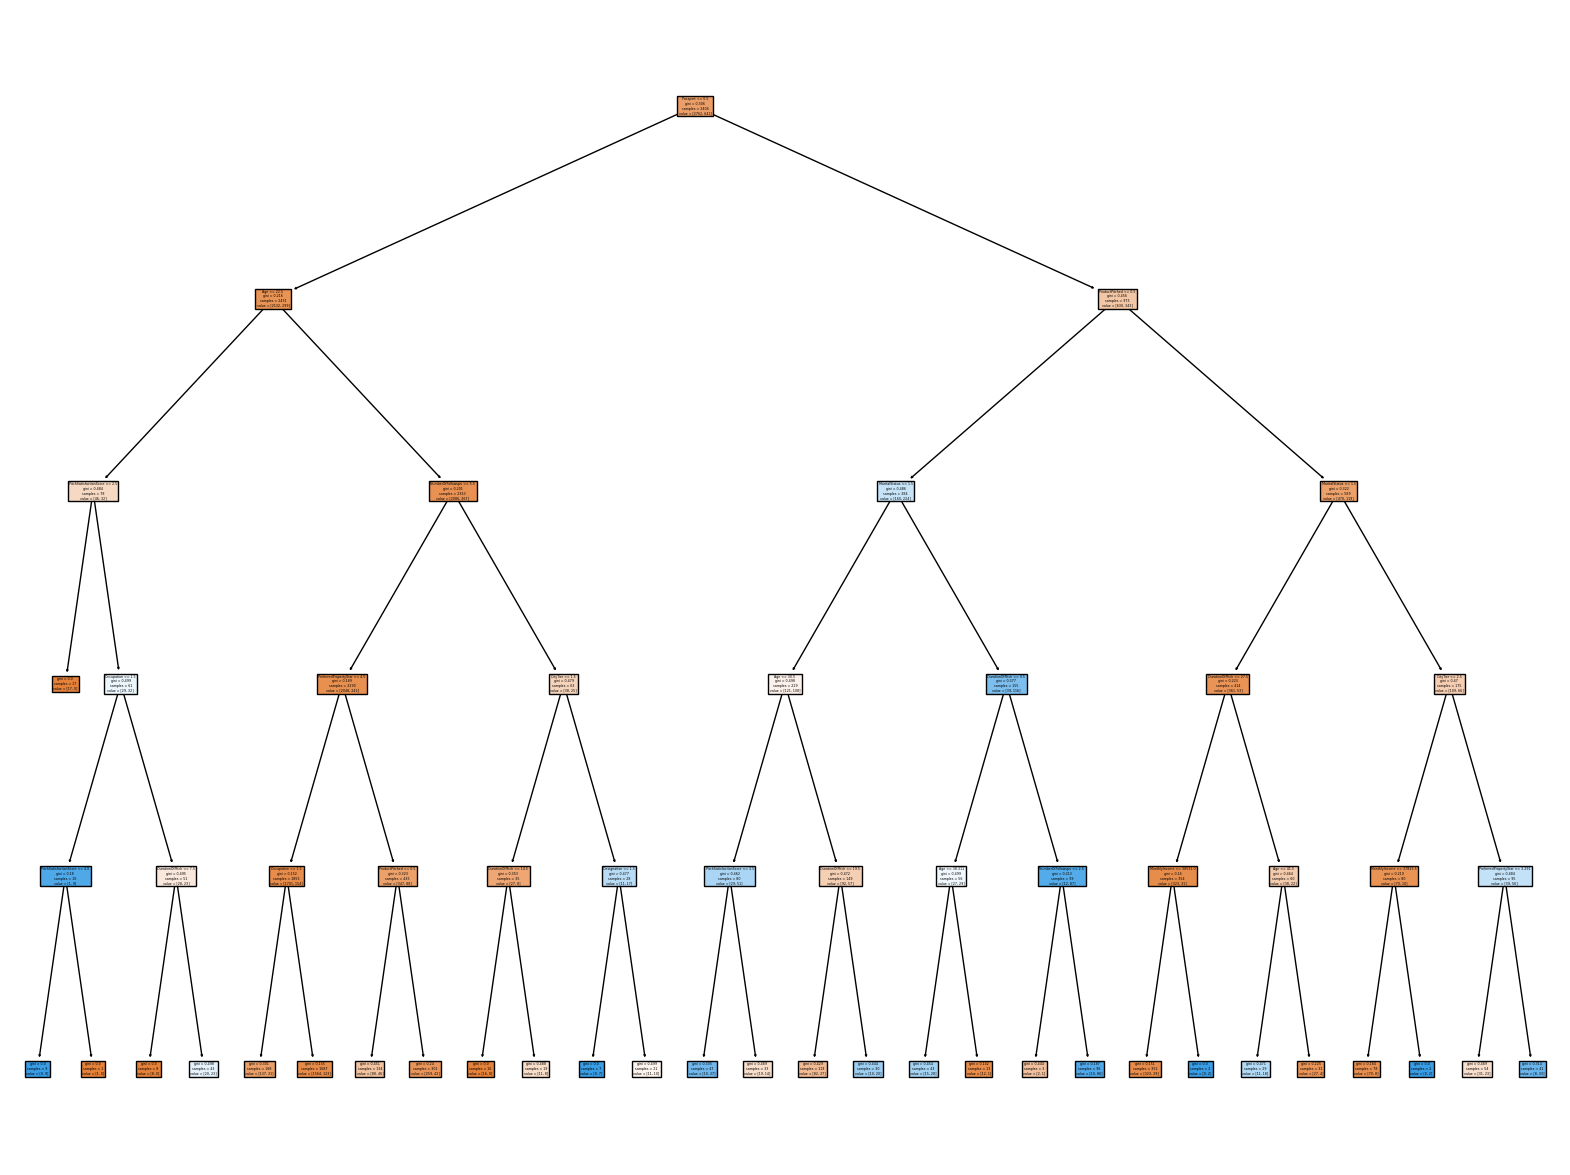

In [3]:
#사이킷런에서 모델을 그림으로 표현해 준다.
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

#트리 시각화
plt.figure(figsize=(20,15))

plot_tree(model,filled=True, feature_names=x_data.columns.to_list())
plt.show()

## 피처 중요도 확인

In [4]:
model.feature_importances_

array([0.10426536, 0.        , 0.0713599 , 0.09325775, 0.02208135,
       0.        , 0.        , 0.03764008, 0.2316099 , 0.05143609,
       0.09053291, 0.        , 0.22522456, 0.04376439, 0.        ,
       0.        , 0.00886257, 0.01996514])

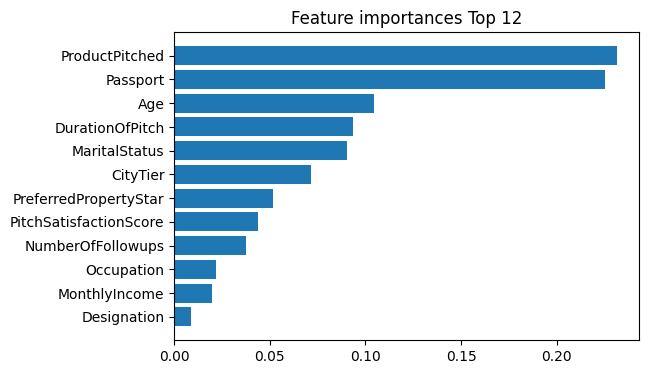

In [10]:
import matplotlib.pyplot as plt


# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(model.feature_importances_, index=x_train.columns  )

# 중요도값 순으로 Series를 정렬
ftr_top12 = ftr_importances.sort_values(ascending=False)[:12]

plt.figure(figsize=(6,4))
plt.title('Feature importances Top 12')
plt.barh(ftr_top12.index,ftr_top12.values)
plt.yticks(ftr_top12.index)
plt.gca().invert_yaxis() #축 뒤집기
plt.show()


In [11]:
ftr_top12.values

array([0.2316099 , 0.22522456, 0.10426536, 0.09325775, 0.09053291,
       0.0713599 , 0.05143609, 0.04376439, 0.03764008, 0.02208135,
       0.01996514, 0.00886257])

In [12]:
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth o